# American Citizens Annual Income Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d amirhosseinmirzaie/americancitizenincome

Dataset URL: https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome
License(s): Community Data License Agreement - Sharing - Version 1.0
100%|█████████████████████████████████████████| 335k/335k [00:02<00:00, 156kB/s]
100%|█████████████████████████████████████████| 335k/335k [00:02<00:00, 156kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/DeepLearning/American Citizens Annual Income Prediction/americancitizenincome.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/DeepLearning/American Citizens Annual Income Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [217]:
df = pd.read_csv('income.csv')

In [218]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [219]:
df.shape

(25000, 15)

In [220]:
df.size

375000

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [222]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,25000.0,38.60916,13.686600,17.0,28.0,37.0,48.00,90.0
fnlwgt,25000.0,189661.13492,105471.299077,12285.0,117983.0,178211.0,237068.25,1484705.0
education.num,25000.0,10.07632,2.576967,1.0,9.0,10.0,12.00,16.0
capital.gain,25000.0,1083.14404,7321.971568,0.0,0.0,0.0,0.00,99999.0
capital.loss,25000.0,87.48980,402.830246,0.0,0.0,0.0,0.00,4356.0
hours.per.week,25000.0,40.44280,12.309706,1.0,40.0,40.0,45.00,99.0


In [223]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [224]:
df.duplicated().sum()

np.int64(12)

In [225]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [226]:
df.nunique()

age                  73
workclass             9
fnlwgt            17876
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        117
capital.loss         90
hours.per.week       93
native.country       41
income                2
dtype: int64

In [227]:
df['income'].value_counts()

income
<=50K    18955
>50K      6045
Name: count, dtype: int64

In [228]:
df['workclass'].value_counts()

workclass
Private             17471
Self-emp-not-inc     1935
Local-gov            1553
?                    1429
State-gov            1004
Self-emp-inc          851
Federal-gov           740
Without-pay            12
Never-worked            5
Name: count, dtype: int64

In [229]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       11518
Never-married             8204
Divorced                  3390
Separated                  792
Widowed                    766
Married-spouse-absent      312
Married-AF-spouse           18
Name: count, dtype: int64

In [230]:
df['relationship'].value_counts()

relationship
Husband           10146
Not-in-family      6345
Own-child          3897
Unmarried          2661
Wife               1207
Other-relative      744
Name: count, dtype: int64

In [231]:
df['occupation'].value_counts()

occupation
Prof-specialty       3198
Craft-repair         3132
Exec-managerial      3114
Adm-clerical         2884
Sales                2812
Other-service        2524
Machine-op-inspct    1535
?                    1434
Transport-moving     1202
Handlers-cleaners    1076
Farming-fishing       770
Tech-support          714
Protective-serv       490
Priv-house-serv       109
Armed-Forces            6
Name: count, dtype: int64

In [232]:
df['capital.gain'].value_counts()

capital.gain
0        22888
15024      275
7688       220
7298       182
99999      119
         ...  
1455         1
41310        1
2387         1
22040        1
6097         1
Name: count, Length: 117, dtype: int64

In [233]:
df['capital.loss'].value_counts()


capital.loss
0       23831
1902      154
1887      127
1977      122
1848       41
        ...  
3683        1
2282        1
2352        1
974         1
2467        1
Name: count, Length: 90, dtype: int64

In [234]:
df['education'].value_counts()

education
HS-grad         8025
Some-college    5621
Bachelors       4104
Masters         1301
Assoc-voc       1063
11th             905
Assoc-acdm       809
10th             736
7th-8th          476
Prof-school      449
9th              403
12th             344
Doctorate        328
5th-6th          265
1st-4th          135
Preschool         36
Name: count, dtype: int64

## Data Visualization

<Figure size 1200x800 with 0 Axes>

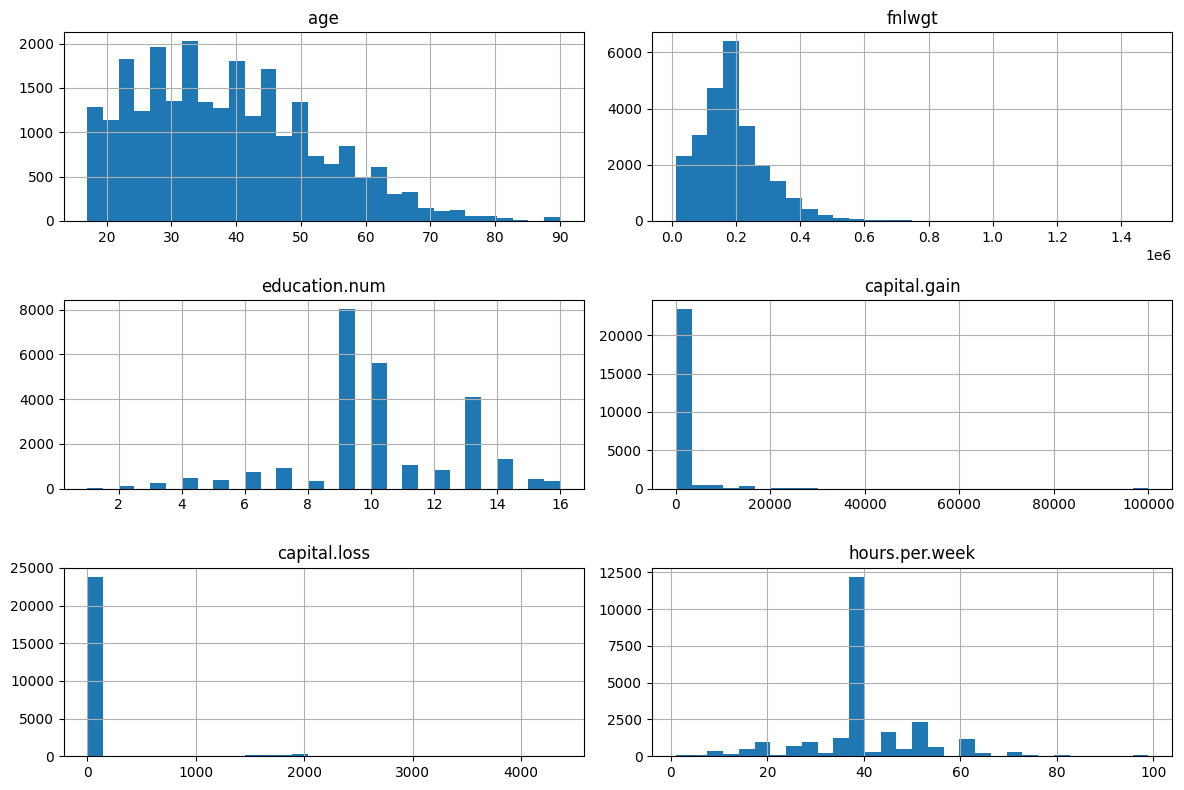

In [235]:
plt.figure(figsize=(12, 8))

numerical_df = df.select_dtypes(include=[np.number])
numerical_df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

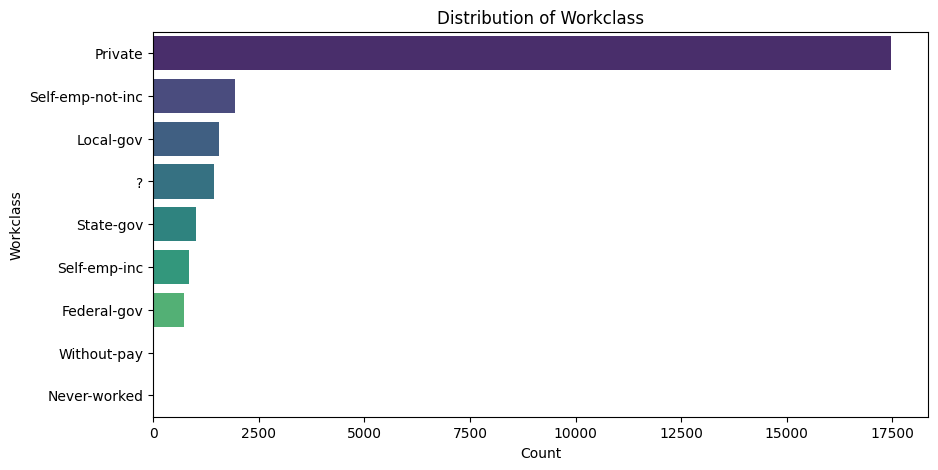

In [236]:
# Workclass Distribution

plt.figure(figsize=(10, 5))
sns.countplot(y=df['workclass'], order=df['workclass'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.title("Distribution of Workclass")
plt.show()

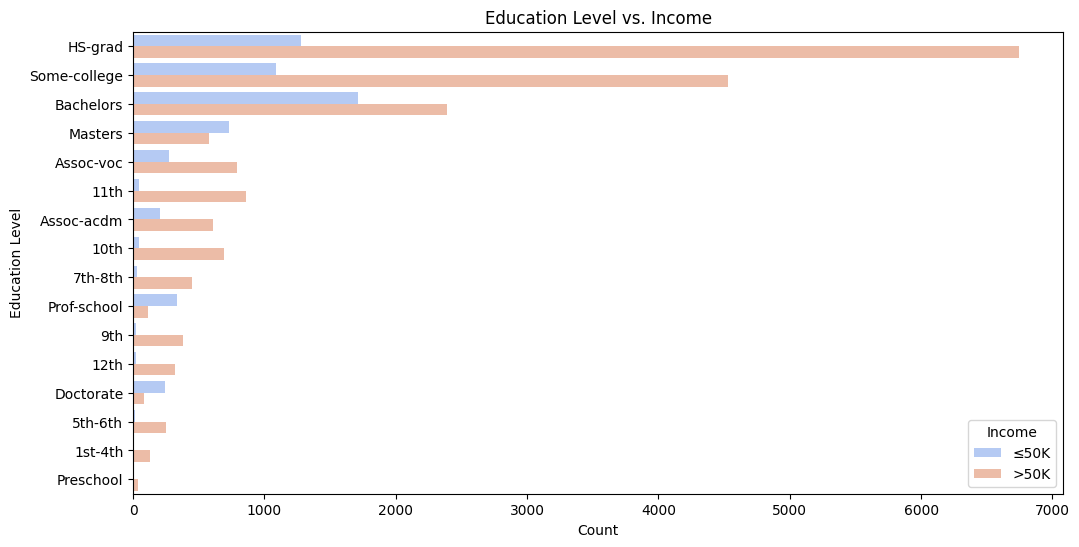

In [237]:
# Education Level vs. Income 

plt.figure(figsize=(12, 6))
sns.countplot(y=df['education'], hue=df['income'], order=df['education'].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.title("Education Level vs. Income")
plt.legend(title="Income", labels=["≤50K", ">50K"])
plt.show()

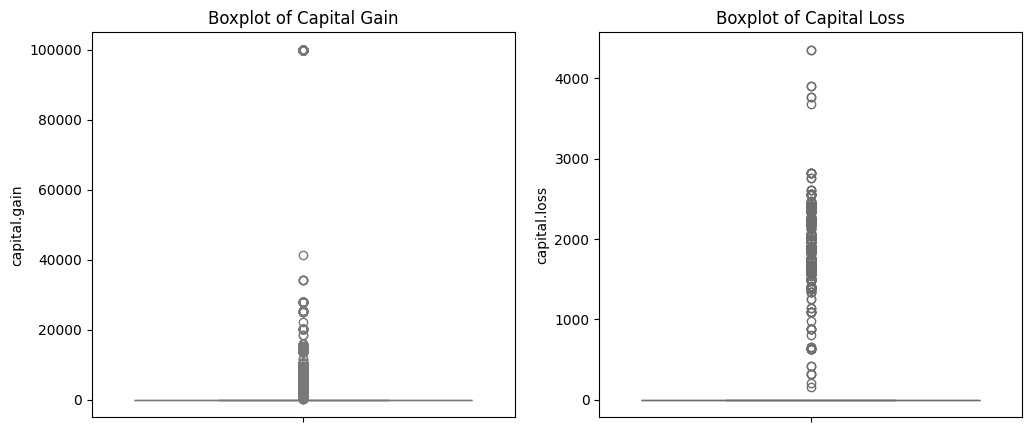

In [238]:
# Capital Gain & Capital Loss Distribution 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['capital.gain'], color="lightblue")
plt.title("Boxplot of Capital Gain")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['capital.loss'], color="lightcoral")
plt.title("Boxplot of Capital Loss")

plt.show()


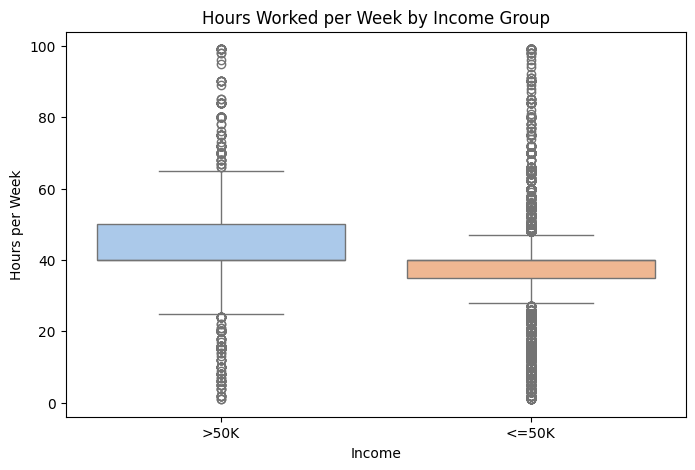

In [239]:
# Hours per Week vs. Income 

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['income'], y=df['hours.per.week'], palette="pastel")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.title("Hours Worked per Week by Income Group")
plt.show()

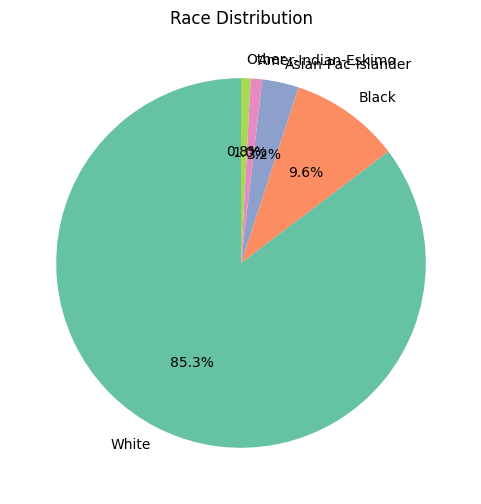

In [240]:
# Race Distribution

plt.figure(figsize=(6, 6))
df['race'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("Set2"), startangle=90)
plt.ylabel("")
plt.title("Race Distribution")
plt.show()

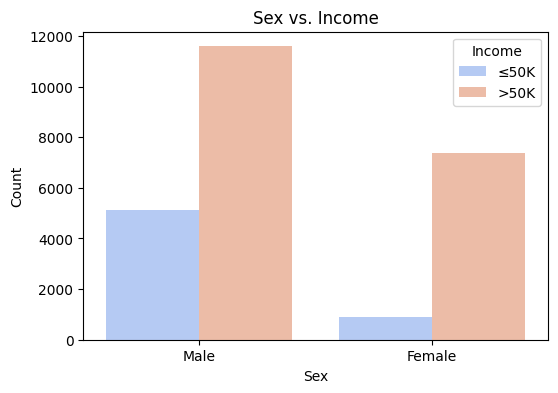

In [241]:
# Sex vs. Income

plt.figure(figsize=(6, 4))
sns.countplot(x=df['sex'], hue=df['income'], palette="coolwarm")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex vs. Income")
plt.legend(title="Income", labels=["≤50K", ">50K"])
plt.show()

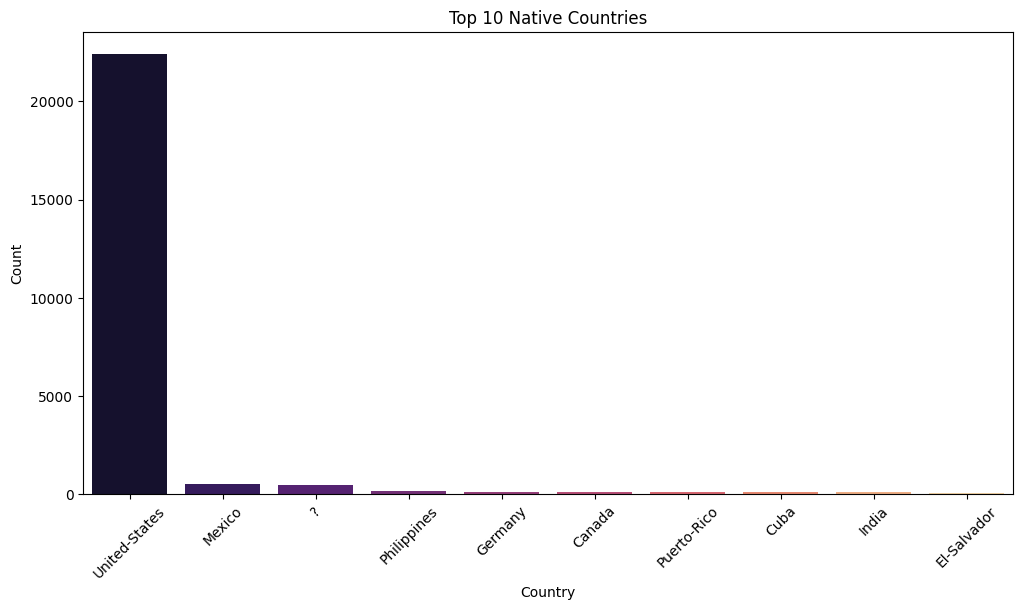

In [242]:
# Native Country Distribution

plt.figure(figsize=(12, 6))
top_countries = df['native.country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Native Countries")
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [198]:
# replacing '?' value to others

df = df.replace('?','others')

In [199]:
# Dropping duplicated values

df.drop_duplicates(inplace=True)

In [200]:
# Binning Age column

bins = [0, 18, 35, 50, 65, 100] 
labels = ['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']

df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [201]:
# Dropping unwanted columns

df.drop(['age','capital.gain', 'capital.loss', 'fnlwgt'], axis=1, inplace=True)

In [202]:
# Removing outlier using zscore

from scipy import stats

def remove_outliers_zscore(df, threshold=3):
    df_no_outliers = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < threshold).all(axis=1)]
    return df_no_outliers

df = remove_outliers_zscore(df)

In [203]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [204]:
X = df.drop('income', axis=1)
y = df['income']

In [205]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
# SMOTE 

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [207]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Model Training Using ML

In [121]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [122]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [123]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train_scaled, y_train_resampled) 
    y_pred = model.predict(X_test_scaled)  
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.756702681072429, 0.7406962785114045, 0.8601440576230492, 0.8437374949979992, 0.806922769107643, 0.8343337334933973, 0.8351340536214485, 0.8053221288515406, 0.8095238095238095]


### Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      3840
           1       0.65      0.28      0.39      1158

    accuracy                           0.80      4998
   macro avg       0.73      0.62      0.63      4998
weighted avg       0.78      0.80      0.77      4998

Confusion Matrix:
 [[3666  174]
 [ 837  321]]


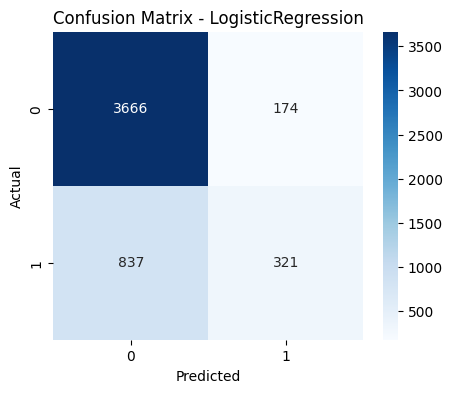

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      3840
           1       0.75      0.36      0.49      1158

    accuracy                           0.82      4998
   macro avg       0.79      0.66      0.69      4998
weighted avg       0.81      0.82      0.80      4998

Confusion Matrix:
 [[3699  141]
 [ 740  418]]


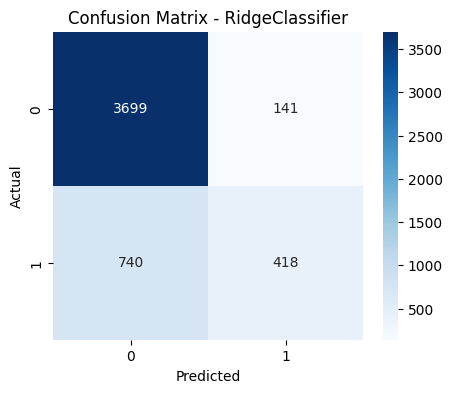

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      3840
           1       0.77      0.64      0.70      1158

    accuracy                           0.87      4998
   macro avg       0.83      0.79      0.81      4998
weighted avg       0.87      0.87      0.87      4998

Confusion Matrix:
 [[3617  223]
 [ 415  743]]


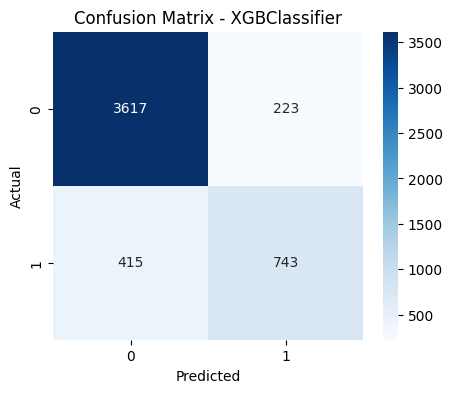

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      3840
           1       0.74      0.62      0.67      1158

    accuracy                           0.86      4998
   macro avg       0.81      0.78      0.79      4998
weighted avg       0.85      0.86      0.86      4998

Confusion Matrix:
 [[3581  259]
 [ 438  720]]


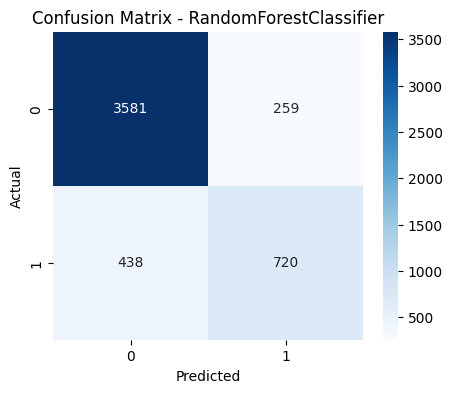

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      3840
           1       0.77      0.51      0.62      1158

    accuracy                           0.85      4998
   macro avg       0.82      0.73      0.76      4998
weighted avg       0.84      0.85      0.84      4998

Confusion Matrix:
 [[3664  176]
 [ 563  595]]


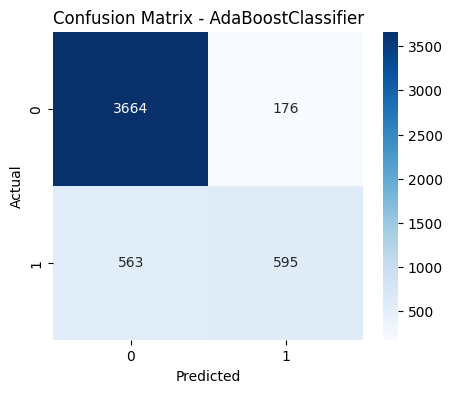

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      3840
           1       0.78      0.59      0.67      1158

    accuracy                           0.87      4998
   macro avg       0.83      0.77      0.79      4998
weighted avg       0.86      0.87      0.86      4998

Confusion Matrix:
 [[3649  191]
 [ 477  681]]


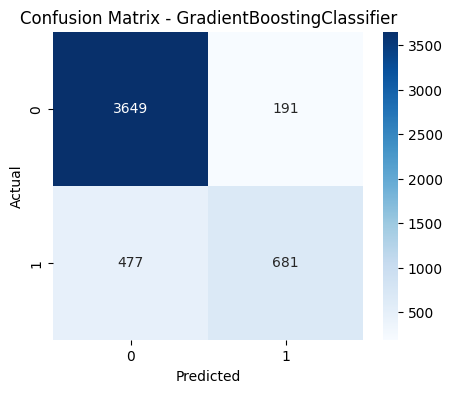

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      3840
           1       0.72      0.57      0.64      1158

    accuracy                           0.85      4998
   macro avg       0.80      0.75      0.77      4998
weighted avg       0.84      0.85      0.84      4998

Confusion Matrix:
 [[3576  264]
 [ 493  665]]


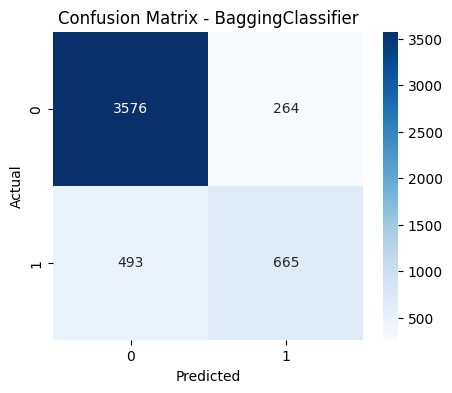

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      3840
           1       0.58      0.61      0.59      1158

    accuracy                           0.81      4998
   macro avg       0.73      0.74      0.73      4998
weighted avg       0.81      0.81      0.81      4998

Confusion Matrix:
 [[3329  511]
 [ 455  703]]


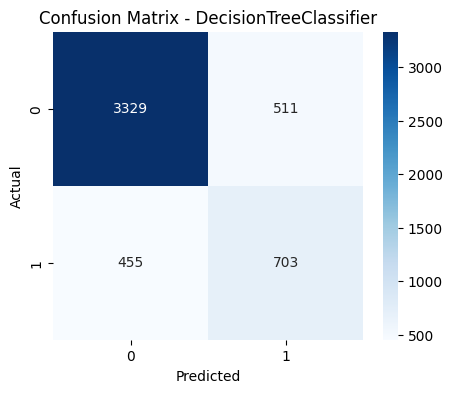

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      3840
           1       0.00      0.00      0.00      1158

    accuracy                           0.77      4998
   macro avg       0.38      0.50      0.43      4998
weighted avg       0.59      0.77      0.67      4998

Confusion Matrix:
 [[3840    0]
 [1158    0]]


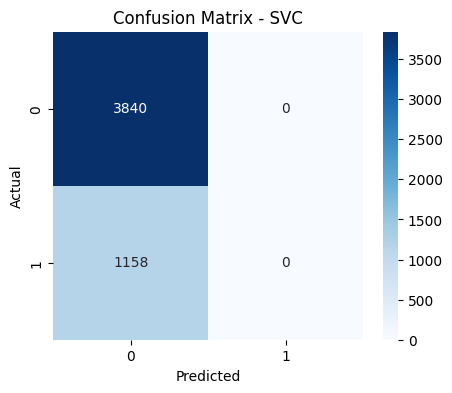

In [124]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()